In [190]:
from google.colab import files
files.upload()

Saving Moon.txt to Moon.txt


{'Moon.txt': b'-2.9427,3.5878,0\n1.1986,1.2473,0\n1.4453,0.94387,0\n2.5198,3.85,0\n3.3139,-2.5384,0\n-3.386,1.0913,0\n3.385,-0.14871,0\n1.7762,2.0934,0\n-2.8435,2.9787,0\n-4.699,-1.4026,0\n-2.7364,1.0436,0\n2.0161,1.0174,0\n-1.5726,2.645,0\n0.90138,4.432,0\n2.0879,2.6499,0\n0.8725,-0.18077,0\n2.427,-4.191,0\n2.5265,-1.9343,0\n-0.75493,-0.25503,0\n-2.7902,1.6697,0\n-2.2518,-0.62691,0\n-3.4715,1.6756,0\n-3.8662,0.63576,0\n3.4646,-0.49608,0\n3.9633,1.8148,0\n-4.0224,-2.1824,0\n2.0487,1.2278,0\n-0.50503,4.8029,0\n-1.1983,-0.83222,0\n2.4507,-1.0229,0\n-0.089376,-2.8221,0\n-0.26336,2.4775,0\n-1.522,2.6274,0\n-0.46134,0.30624,0\n2.9771,-1.1558,0\n4.7421,-0.62358,0\n2.8811,2.4219,0\n0.26605,1.7149,0\n-0.39639,-3.5353,0\n1.3212,1.6227,0\n-0.73215,-2.7402,0\n-2.9575,3.2798,0\n-4.4729,2.142,0\n2.5986,-1.9071,0\n-0.55233,1.147,0\n1.3541,-2.2026,0\n4.7047,1.4839,0\n-1.4663,-1.8598,0\n-1.4378,3.1872,0\n-4.0383,-2.3344,0\n-3.6062,-1.5685,0\n2.7553,1.8822,0\n-0.18702,0.042696,0\n-2.8271,-0.81663,0\n-0

In [0]:
import pandas as pd
data=pd.read_csv('Moon.txt',sep=",",header=None)
#from sklearn.utils import shuffle
#data = shuffle(data)

In [0]:
X=data.iloc[ :, :-1].values
Y=data.iloc[:,2].values
#Y=Y-1

In [209]:
print(Y.shape)

(1000,)


In [210]:
print(X.shape)

(1000, 2)


In [0]:

import numpy as np

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)



In [0]:

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [0]:
def sigmoid(z):
  d=1/(1+np.exp(-z))
  return d
 

In [0]:
m_train=X_train.shape[0];
m_test=X_test.shape[0];
feat=X_train.shape[1];

In [0]:
def initialise(dim):
  W=np.zeros(shape=(dim,1))
  b=0.00
  return W,b

In [0]:
def propagate(W,b,X,Y):
  m=X.shape[1]
  A=sigmoid(np.dot(W.T,X)+b);
  cost=-1/m*(np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))));
  dW=1/m*np.dot(X,(A-Y).T);
  db=1/m*np.sum(A-Y);
  grads = {"dW": dW,
             "db": db};
  return grads,cost;
    


In [0]:
def optimise(W,b,X,Y,num_iteration,alpha):
  costs=[]
  for i in range(num_iteration):
    grads,cost=propagate(W,b,X,Y)
    dW=grads['dW'];
    db=grads['db'];
    W=W-alpha*dW;
    b=b-alpha*db;
    costs.append(cost);
   
  parameters={"W": W,
                "b":b
               }
  gradients={"dW":dW,
               "db":db}
   
  return parameters,gradients


In [0]:
def prediction(W,b,X):
  m=X.shape[1];
  A=np.dot(W.T,X)+b;
  A=sigmoid(A)
  Y_p=np.zeros(shape=(1,m))
  for i in range(A.shape[1]):
    if(A[0,i]>=0.5):
      Y_p[0,i]=1;
      
      
  return Y_p;      
    

In [0]:
def model(X_train,Y_train,X_test,Y_test,num_iteration,alpha):
  W,b=initialise(X_train.shape[0])
  parameters, grads = optimise(W, b, X_train, Y_train, num_iteration,alpha)
  W=parameters['W'];
  b=parameters['b'];
  Y_prediction_test = prediction(W, b, X_test)
  Y_prediction_train = prediction(W,b,X_train)
  print(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100);
  print((100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100));
  d = {  "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iteration};
  return d;
  
  

In [254]:
d = model(X_train.T, Y_train.T, X_test.T ,Y_test.T, num_iteration = 1000, alpha=0.5)

85.5
88.0


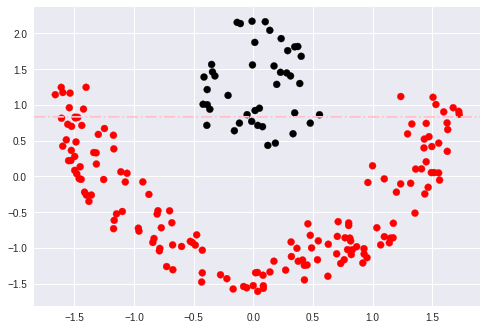

In [255]:
import matplotlib as mpl
import matplotlib.pyplot as plt
colors=["black","red"];
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,cmap=mpl.colors.ListedColormap(colors))
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * d["W"][0] + d["b"])/d["W"][1]
plt.plot(x_vals, y_vals, '-.', c="pink")
